# Optimisation: Nelder-Mead

This example shows you how to run a local optimisation with the [Nelder-Mead](http://pints.readthedocs.io/en/latest/optimisers/nelder_mead.html) downhill simplex method.

The [Nelder-Mead method](https://en.wikipedia.org/wiki/Nelder–Mead_method) is a classical (deterministic) derivative-free optimisation method. It can be very fast if started near the true solution, but can easily get stuck on difficult problems. Nelder-Mead is essentially sequential in nature and cannot easily be parallelised.

In [1]:
import pints
import pints.toy

# Create Rosenbrock error (optimum is at 1,1)
f = pints.toy.RosenbrockError()

# Pick starting point
x0 = [-0.75, 3.5]
opt = pints.OptimisationController(f, x0, method=pints.NelderMead)
x, fx = opt.run()

print('Found: ' + str(x))

Minimising error measure
Using Nelder-Mead
Running in sequential mode.
Iter. Eval. Best      Current   Time m:s
0     3      865.9531  865.9531   0:00.0
1     4      832.5452  832.5452   0:00.0
2     5      832.5452  832.5452   0:00.0
3     6      628.243   628.243    0:00.0
20    23     4.95828   4.95828    0:00.0
40    43     3.525867  3.525867   0:00.0
60    63     2.377579  2.377579   0:00.0
80    83     1.114115  1.114115   0:00.0
100   103    0.551     0.551      0:00.0
120   123    0.237     0.237      0:00.0
140   143    0.0666    0.0666     0:00.0
160   163    0.00181   0.00181    0:00.0
180   183    6.96e-06  6.96e-06   0:00.0
200   203    2.66e-08  2.66e-08   0:00.0
220   223    5.06e-11  5.06e-11   0:00.0
240   243    2.43e-15  2.43e-15   0:00.0
260   263    5.58e-18  5.58e-18   0:00.0
280   283    7.74e-20  7.74e-20   0:00.0
300   303    6.66e-23  6.66e-23   0:00.0
320   323    1.86e-25  1.86e-25   0:00.0
340   343    3.16e-28  3.16e-28   0:00.0
360   364    3.08e-31  3.08

For a new run of the algorithm, we can use the ask-and-tell interface to visualise its progress through the search-space:

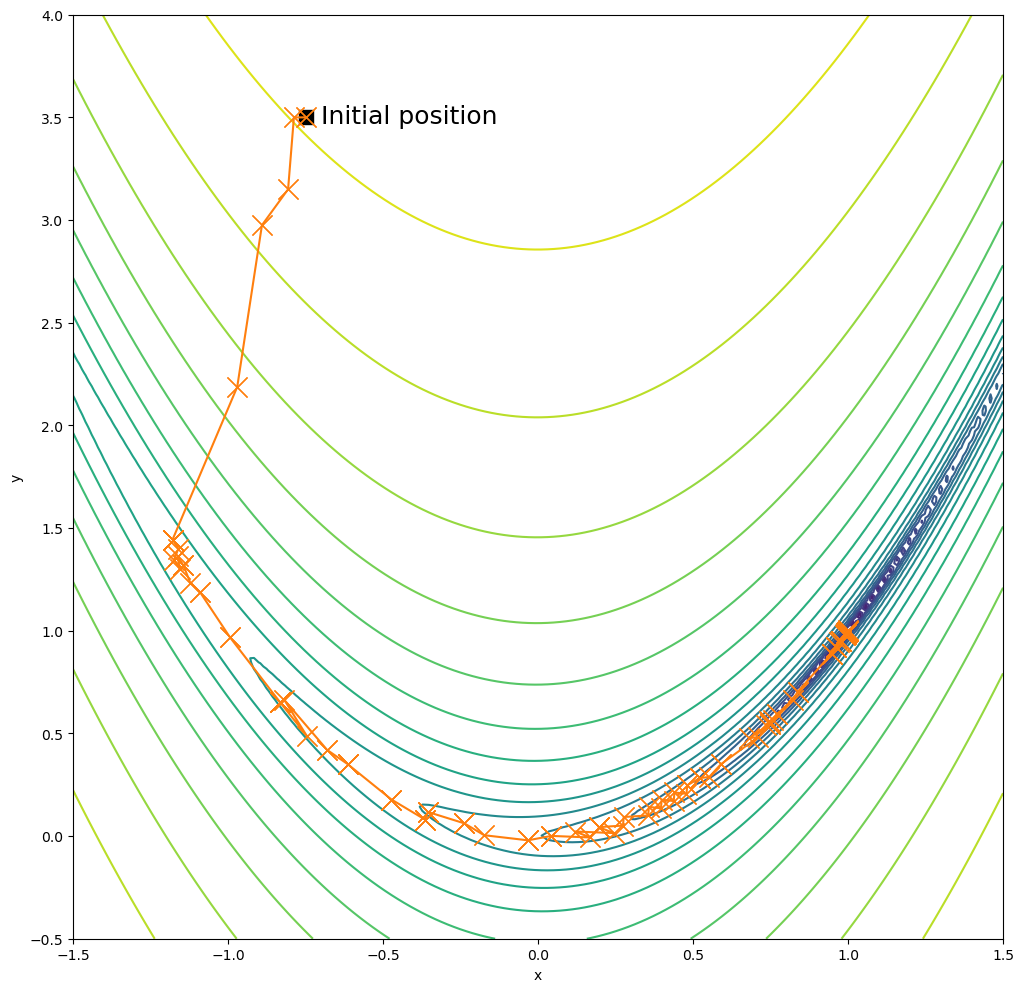

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show function
x = np.linspace(-1.5, 1.5, 150)
y = np.linspace(-0.5, 4, 225)
X, Y = np.meshgrid(x, y)
Z = [[np.log(f([i, j])) for i in x] for j in y]
levels = np.linspace(np.min(Z), np.max(Z), 20)
ax.contour(X, Y, Z, levels = levels)

# Show initial position
ax.plot(x0[0], x0[1], 'ks', markersize=10)
ax.text(x0[0] + 0.05, x0[1] - 0.03, 'Initial position', fontsize=18)

# Run 400 iterations with ask-and-tell, storing all positions
e = pints.SequentialEvaluator(f)
nm = pints.NelderMead(x0)
path = [x0]
for i in range(400):
    xs = nm.ask()
    fs = e.evaluate(xs)
    nm.tell(fs)
    path.append(nm.x_best())

# Plot path
path = np.array(path).T
ax.plot(path[0], path[1], 'x-', color='tab:orange', markersize=15)
plt.show()